In [1043]:
import numpy as np
import pandas as pd

import equity_tools as eqt
import importlib
importlib.reload(eqt)
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Get equity index data

In [1018]:
# index component set analysis
sp500_constituents = eqt.get_index_constituents(index='sp500')
nasdaq100_constituents = eqt.get_index_constituents(index='nasdaq100')
dowjones_constituents = eqt.get_index_constituents(index='dowjones')

sp500_set = set(sp500_constituents.symbol)
nasdaq100_set = set(nasdaq100_constituents.symbol)
dowjones_set = set(dowjones_constituents.symbol)

# intersection with S&P500
nasdaq100_unique = round(100 * len(nasdaq100_set - sp500_set) / len(nasdaq100_set), 2)
dowjones_unique = round(100 * len(dowjones_set - sp500_set) / len(dowjones_set), 2)
print(f'nasdaq100_unique: {nasdaq100_unique}%, dowjones_unique: {dowjones_unique}%')

nasdaq100_intersection = round(100 * len(sp500_set & nasdaq100_set) / len(nasdaq100_set), 2)
dowjones_intersection = round(100 * len(sp500_set & dowjones_set) / len(dowjones_set), 2)
print(f'nasdaq100_intersection with sp500: {nasdaq100_intersection}%, dowjones_intersection with sp500: {dowjones_intersection}%')

nasdaq100_unique: 15.84%, dowjones_unique: 0.0%
nasdaq100_intersection with sp500: 84.16%, dowjones_intersection with sp500: 100.0%


In [1019]:
# get price and returns
sp500_output_dict = eqt.get_price_returns(index='sp500', interval='1d')
nasdaq100_output_dict = eqt.get_price_returns(index='nasdaq100', interval='1d')
dowjones_output_dict = eqt.get_price_returns(index='dowjones', interval='1d')

# prices
sp500_prices = sp500_output_dict['prices']
nasdaq100_prices = nasdaq100_output_dict['prices']
dowjones_prices = dowjones_output_dict['prices']

# returns
sp500_returns = sp500_output_dict['returns']
nasdaq100_returns = nasdaq100_output_dict['returns']
dowjones_returns = dowjones_output_dict['returns']

[*********************100%%**********************]  506 of 506 completed
[*********************100%%**********************]  104 of 104 completed
[*********************100%%**********************]  33 of 33 completed


### Correlation matrix

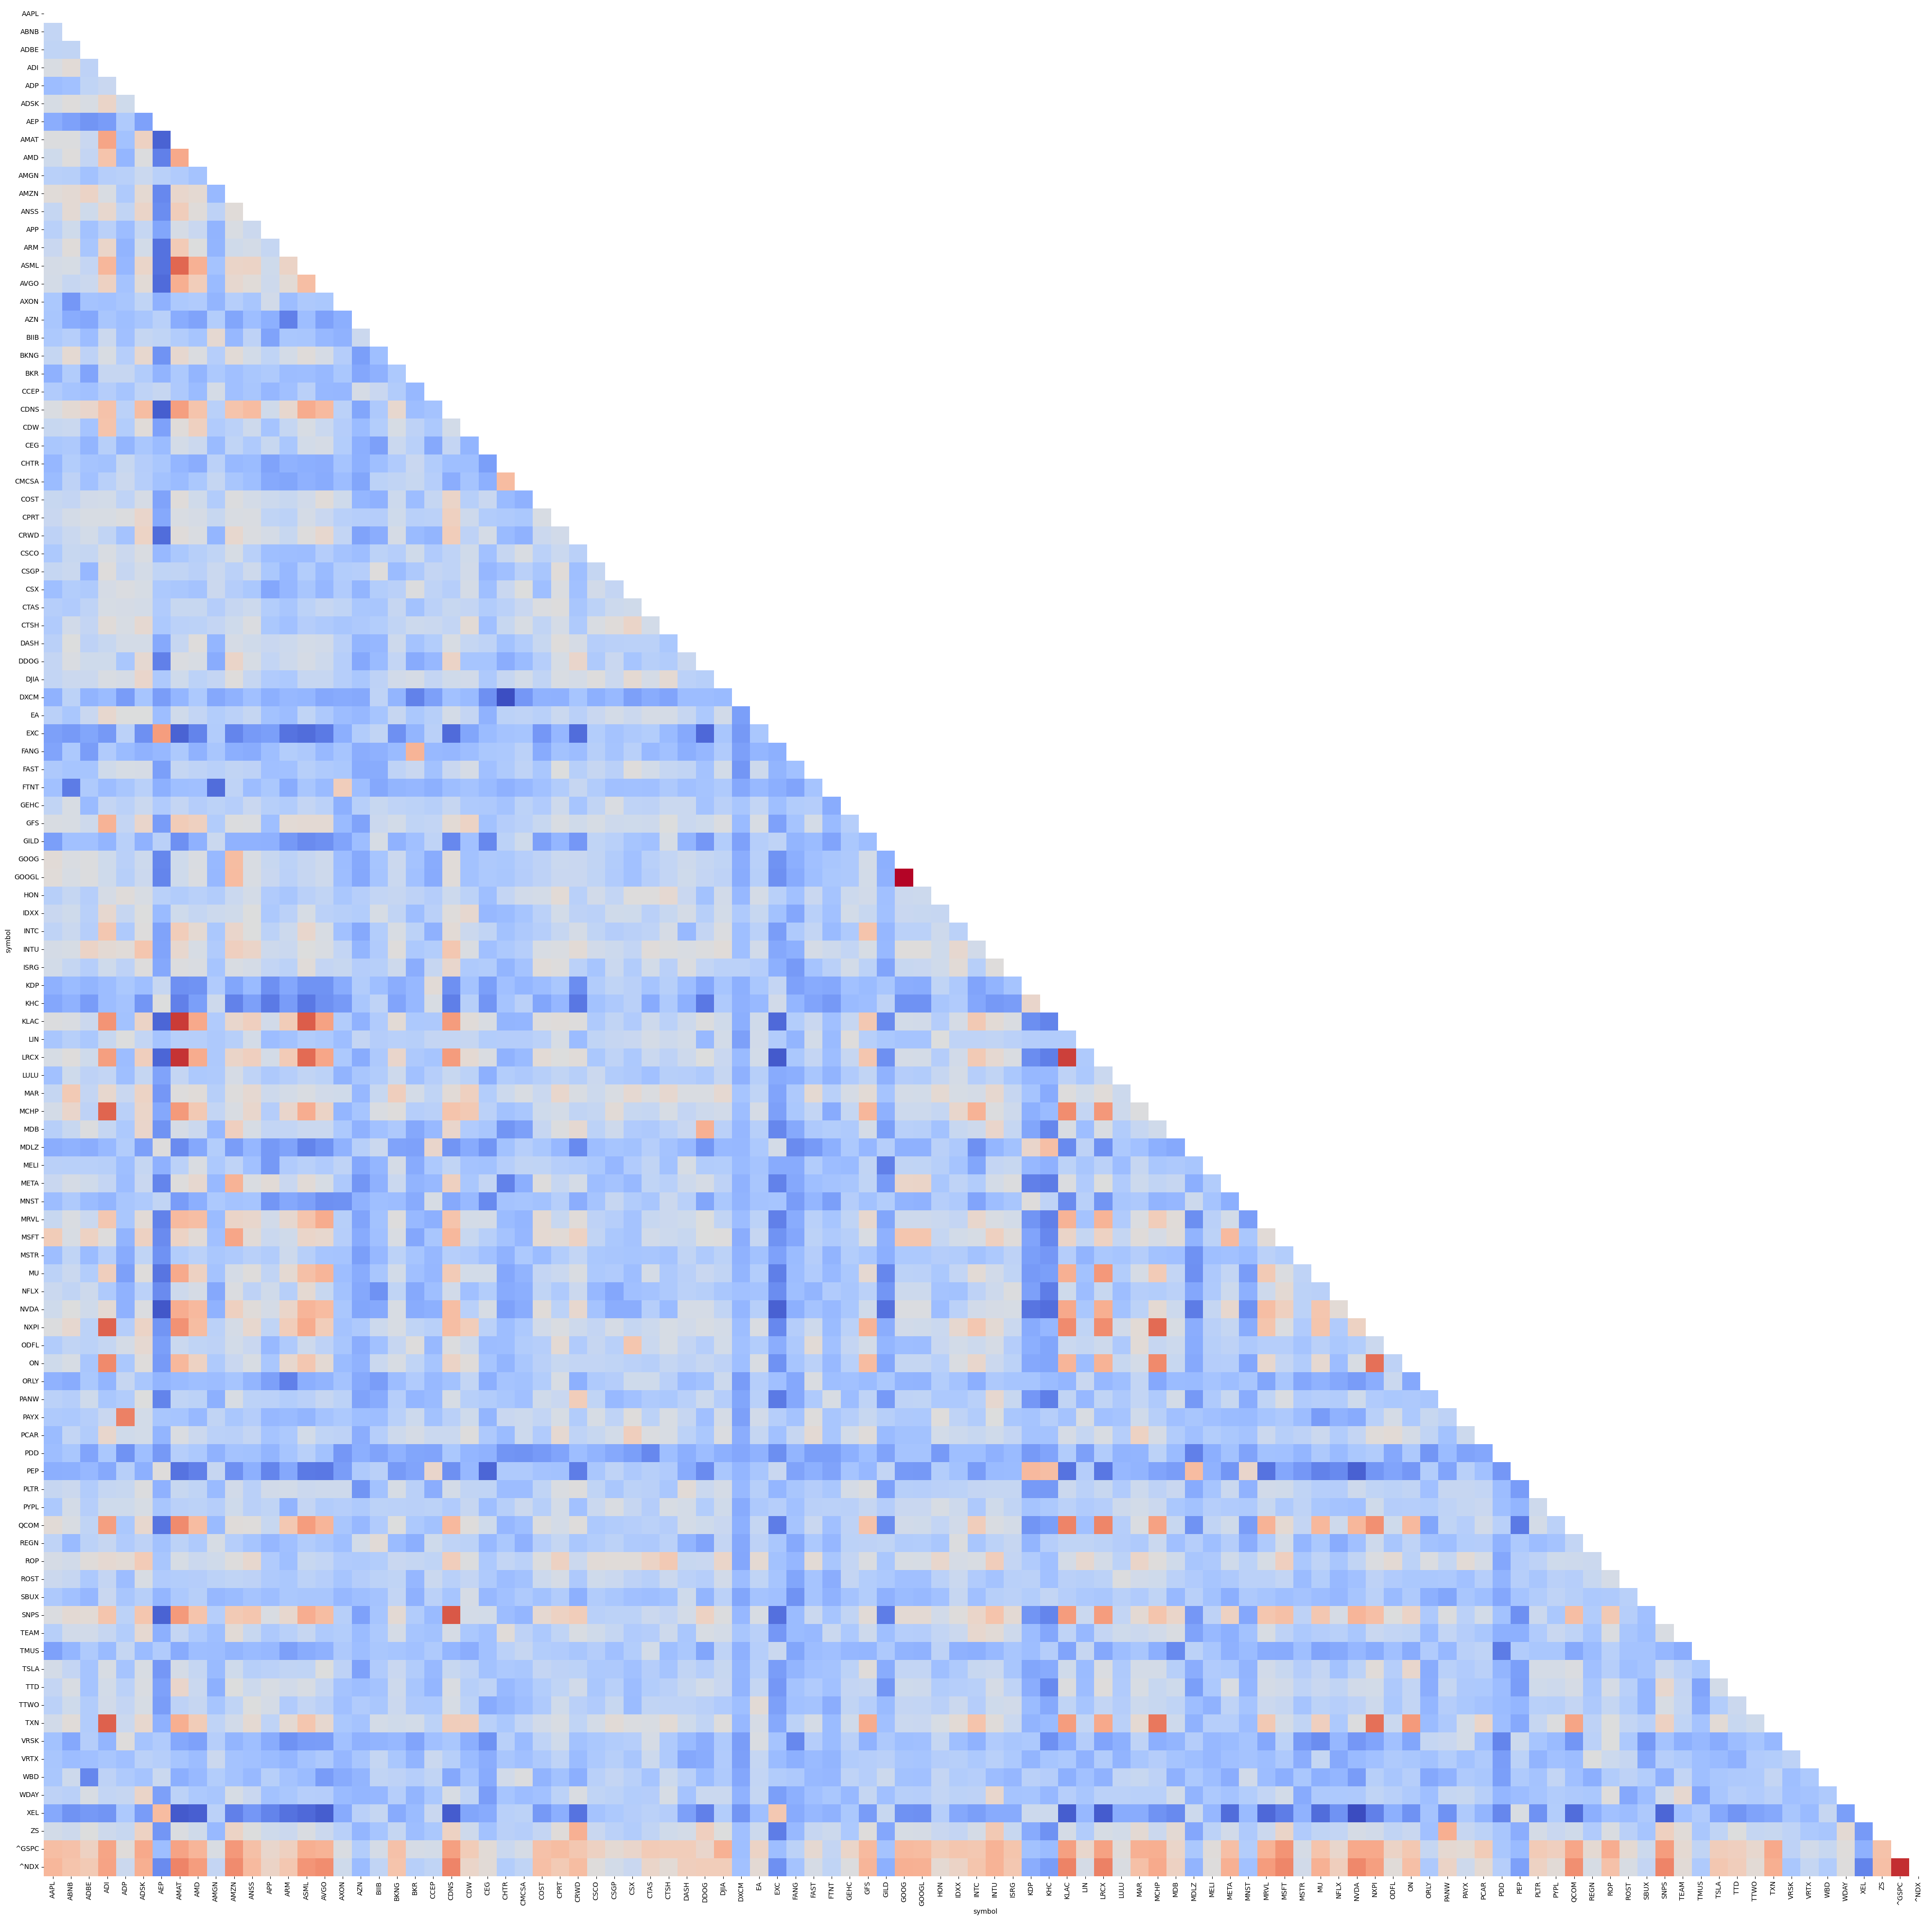

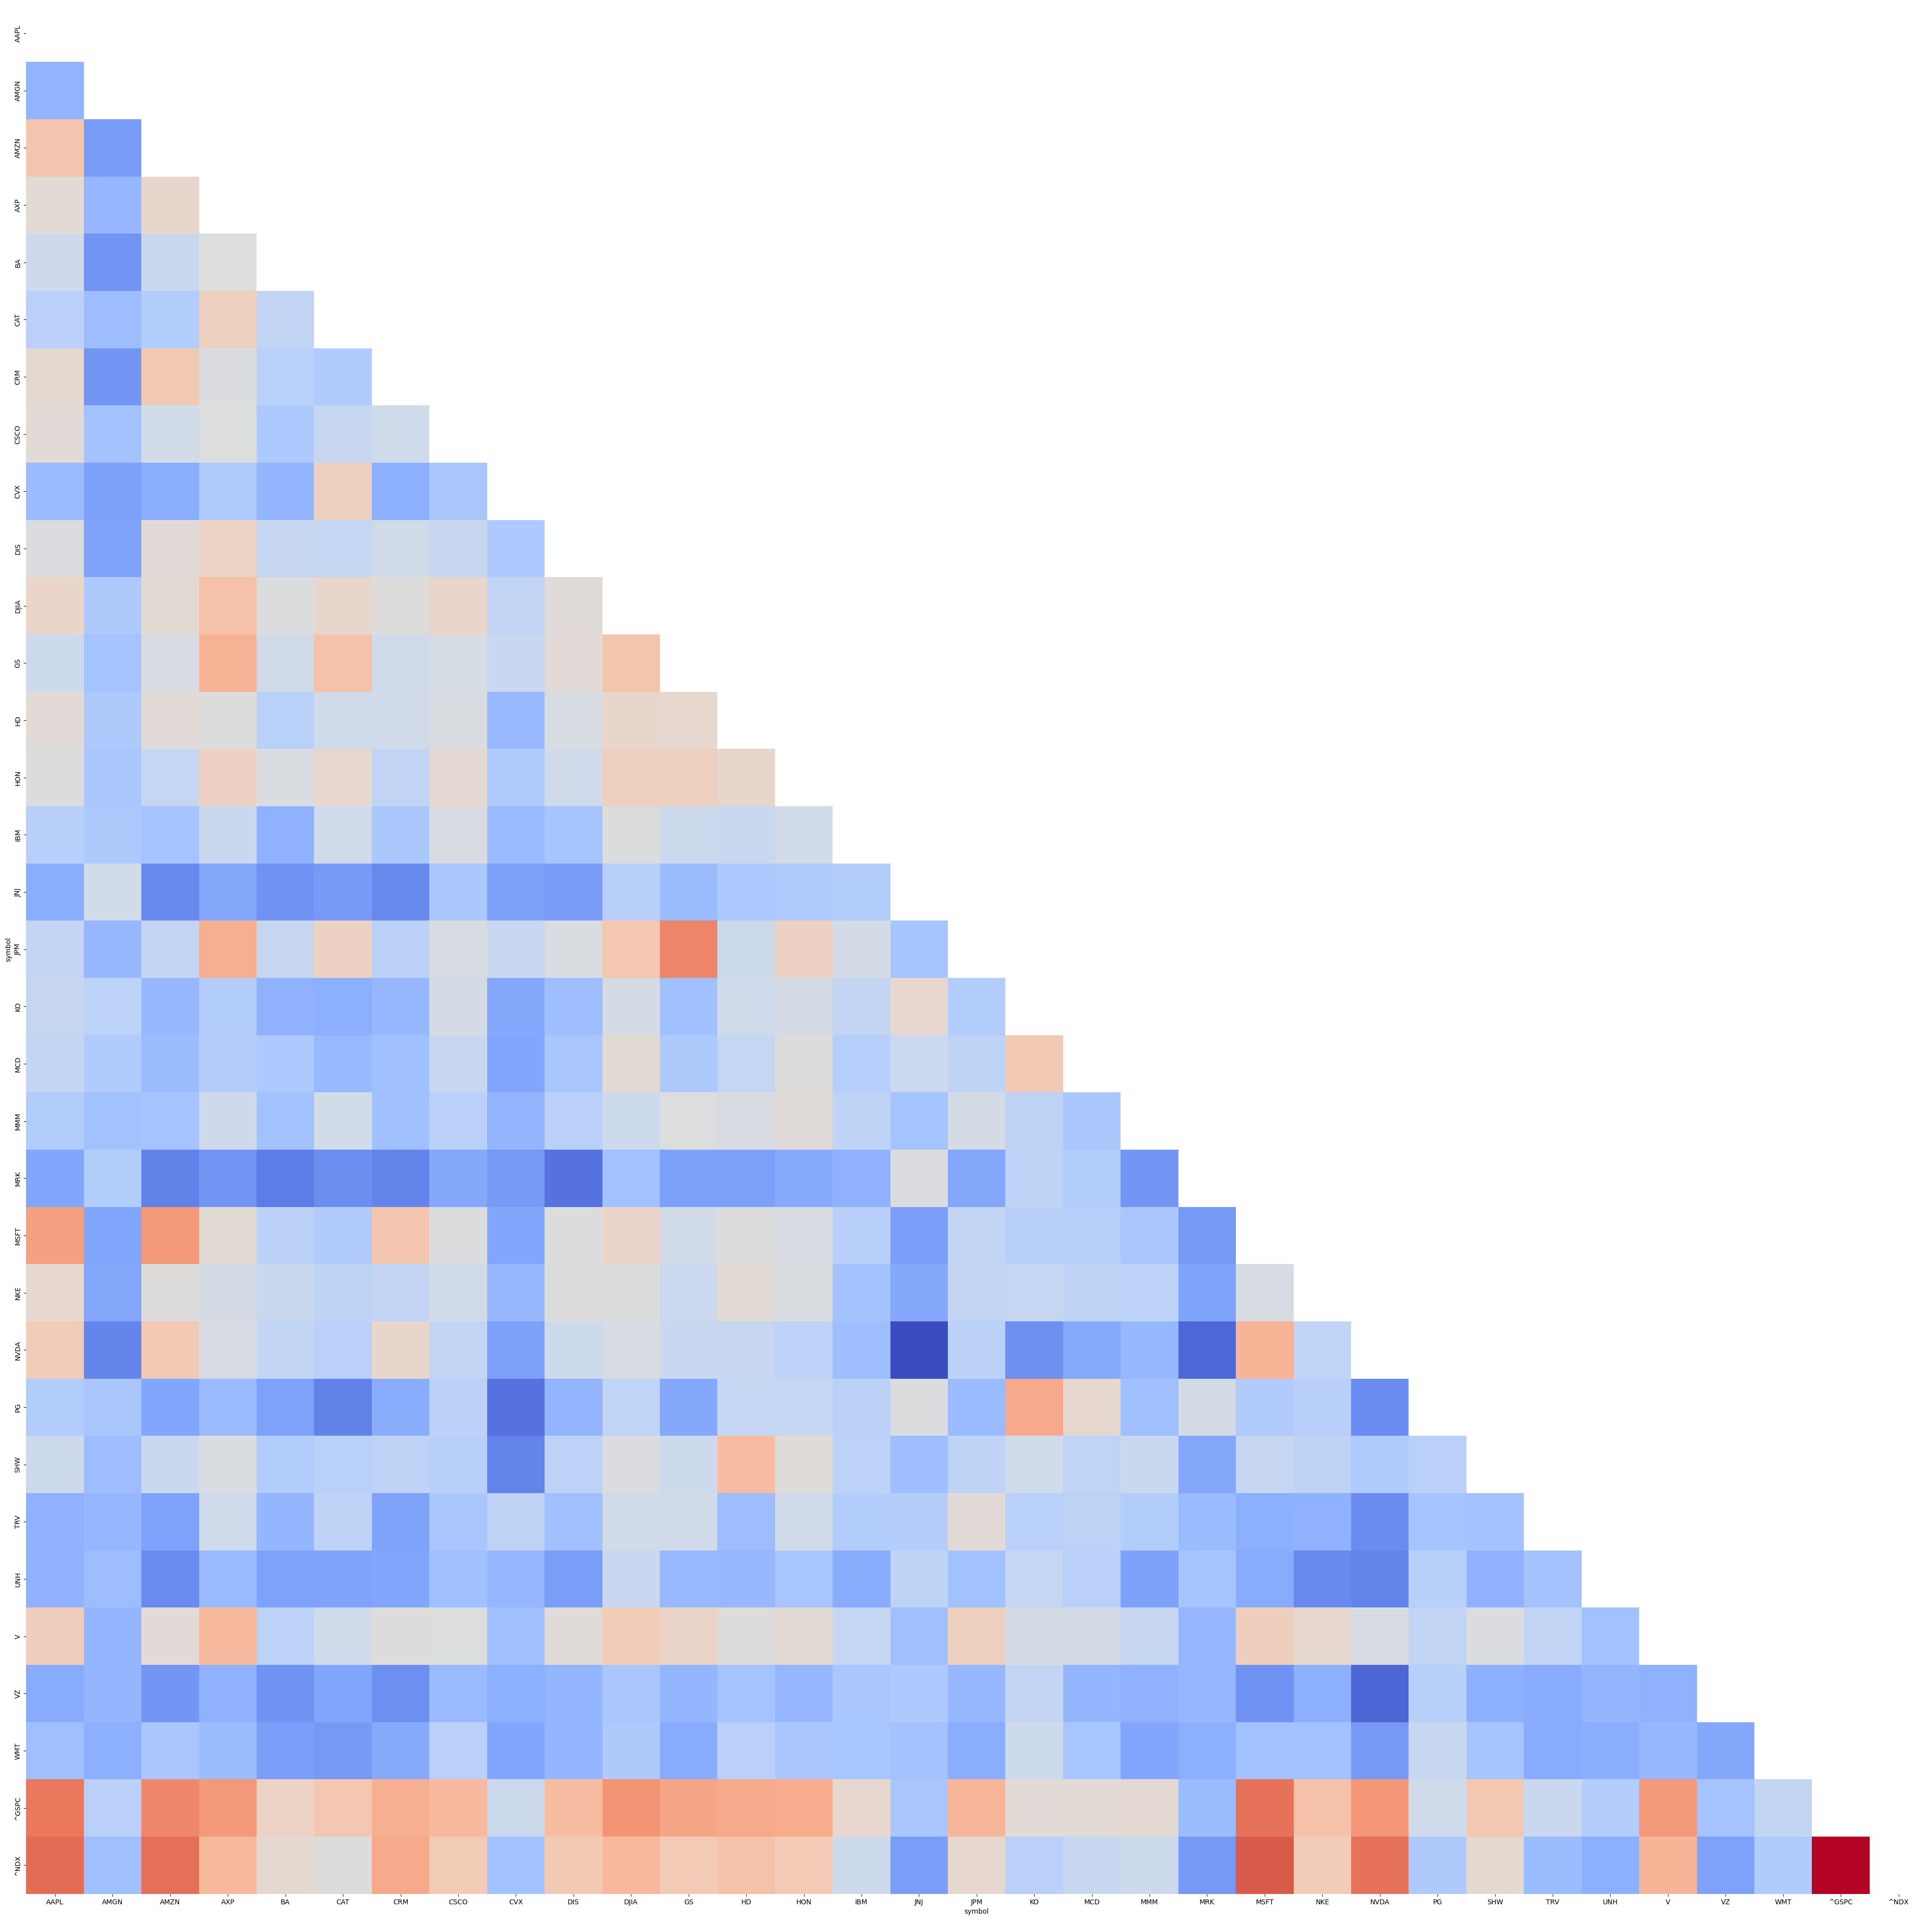

In [1045]:
fig,ax = plt.subplots(figsize=(100,100))
sp500_corrmat = eqt.plot_corr_mat(sp500_returns, ax=ax)

fig,ax = plt.subplots(figsize=(50,50))
nasdaq100_corrmat = eqt.plot_corr_mat(nasdaq100_returns, ax=ax)

fig,ax = plt.subplots(figsize=(50,50))
dowjones_corrmat = eqt.plot_corr_mat(dowjones_returns, ax=ax)

### Static betas

In [1063]:
sp500_static_betas = eqt.vectorized_beta(sp500_returns.dropna(), market_definition='^GSPC') # ^GSPC
nasdaq100_static_betas = eqt.vectorized_beta(nasdaq100_returns.dropna(), market_definition='^GSPC') # ^NDX
dowjones_static_betas = eqt.vectorized_beta(dowjones_returns.dropna(), market_definition='^GSPC') # DJIA

sp500_static_corrs = eqt.vectorized_corr(sp500_returns.dropna(), market_definition='^GSPC') # ^GSPC
nasdaq100_static_corrs = eqt.vectorized_corr(nasdaq100_returns.dropna(), market_definition='^GSPC') # ^NDX
dowjones_static_corrs = eqt.vectorized_corr(dowjones_returns.dropna(), market_definition='^GSPC') # DJIA

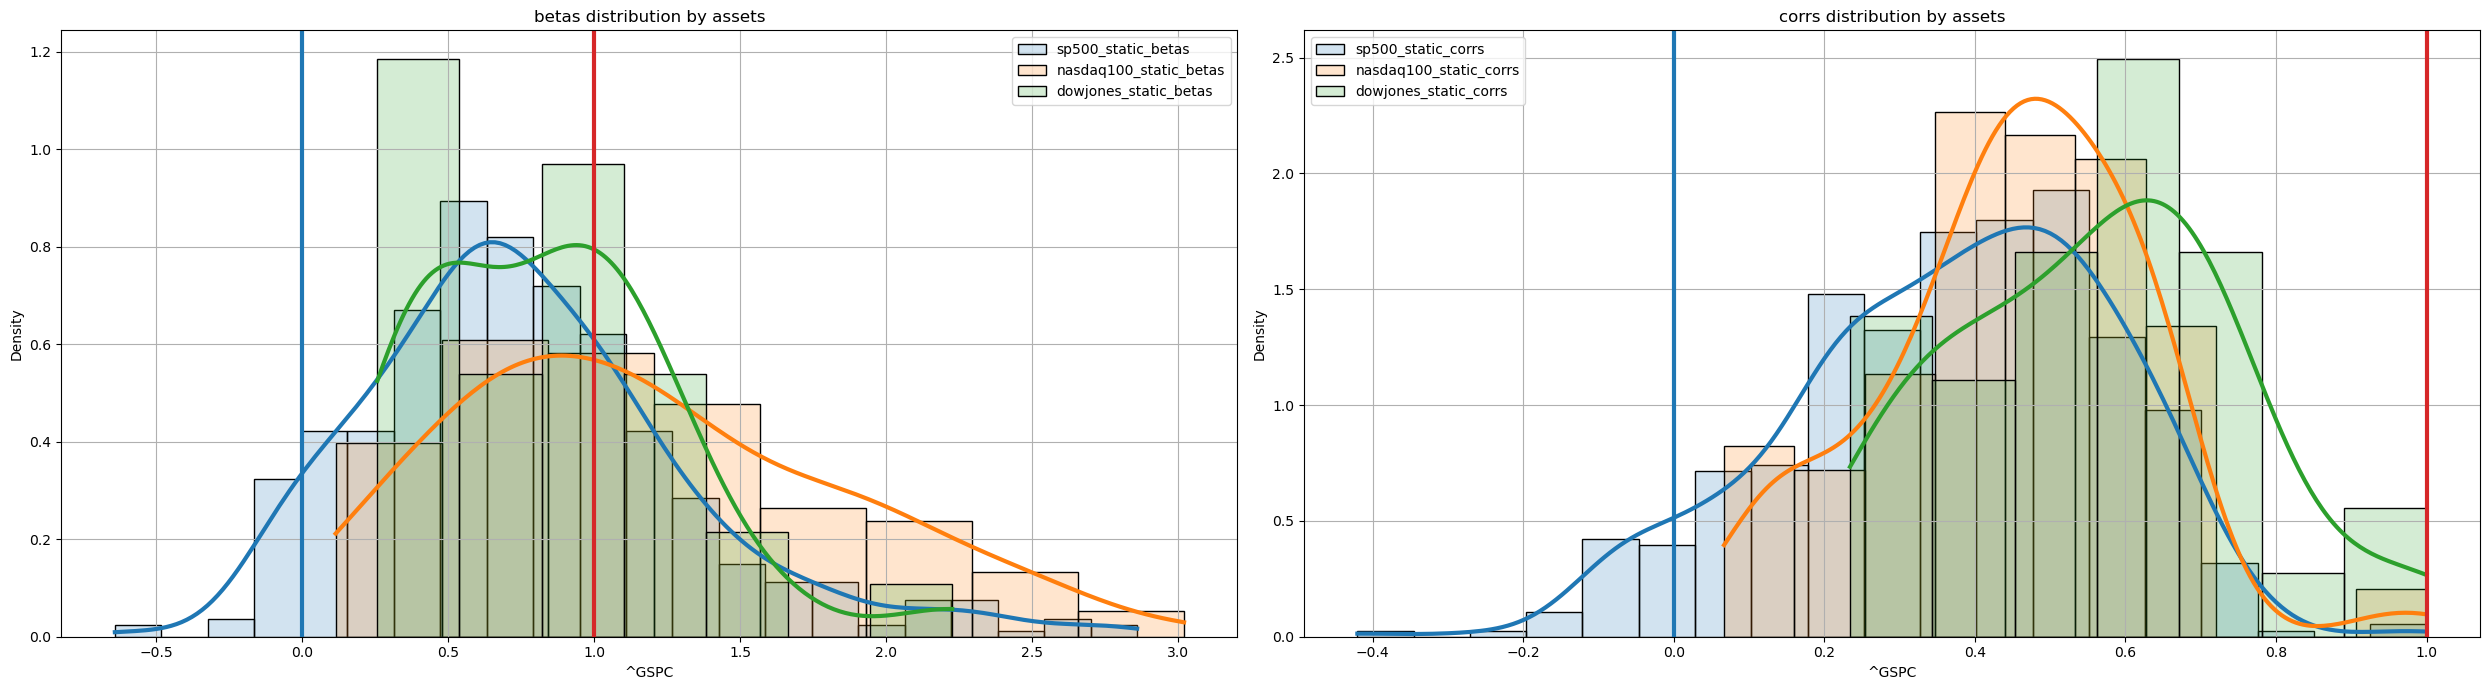

In [1065]:
fig,ax = plt.subplots(1,2, figsize=(25,7))
# plot beta distributions
sns.histplot(sp500_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='sp500_static_betas')
sns.histplot(nasdaq100_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='nasdaq100_static_betas')
sns.histplot(dowjones_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='dowjones_static_betas')
ax[0].set_title('betas distribution by assets')

# plot correlation distributions
sns.histplot(sp500_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='sp500_static_corrs')
sns.histplot(nasdaq100_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='nasdaq100_static_corrs')
sns.histplot(dowjones_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='dowjones_static_corrs')
ax[1].set_title('corrs distribution by assets')

for i in range(len(ax)):
    ax[i].axvline(1, c='tab:red', lw=3);
    ax[i].axvline(0, c='tab:blue', lw=3);
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

2.8600033688895112 2.8600033688895086
symbol
CBOE   -0.642417
K      -0.515772
AMT    -0.234221
ED     -0.174245
GIS    -0.170987
Name: ^GSPC, dtype: float64
symbol
SBAC    0.008142
AEE     0.035638
LNT     0.040704
HSY     0.044165
LMT     0.050241
Name: ^GSPC, dtype: float64
symbol
TSLA    2.860003
MPWR    2.789105
AVGO    2.695849
INTC    2.678764
NVDA    2.609453
Name: ^GSPC, dtype: float64


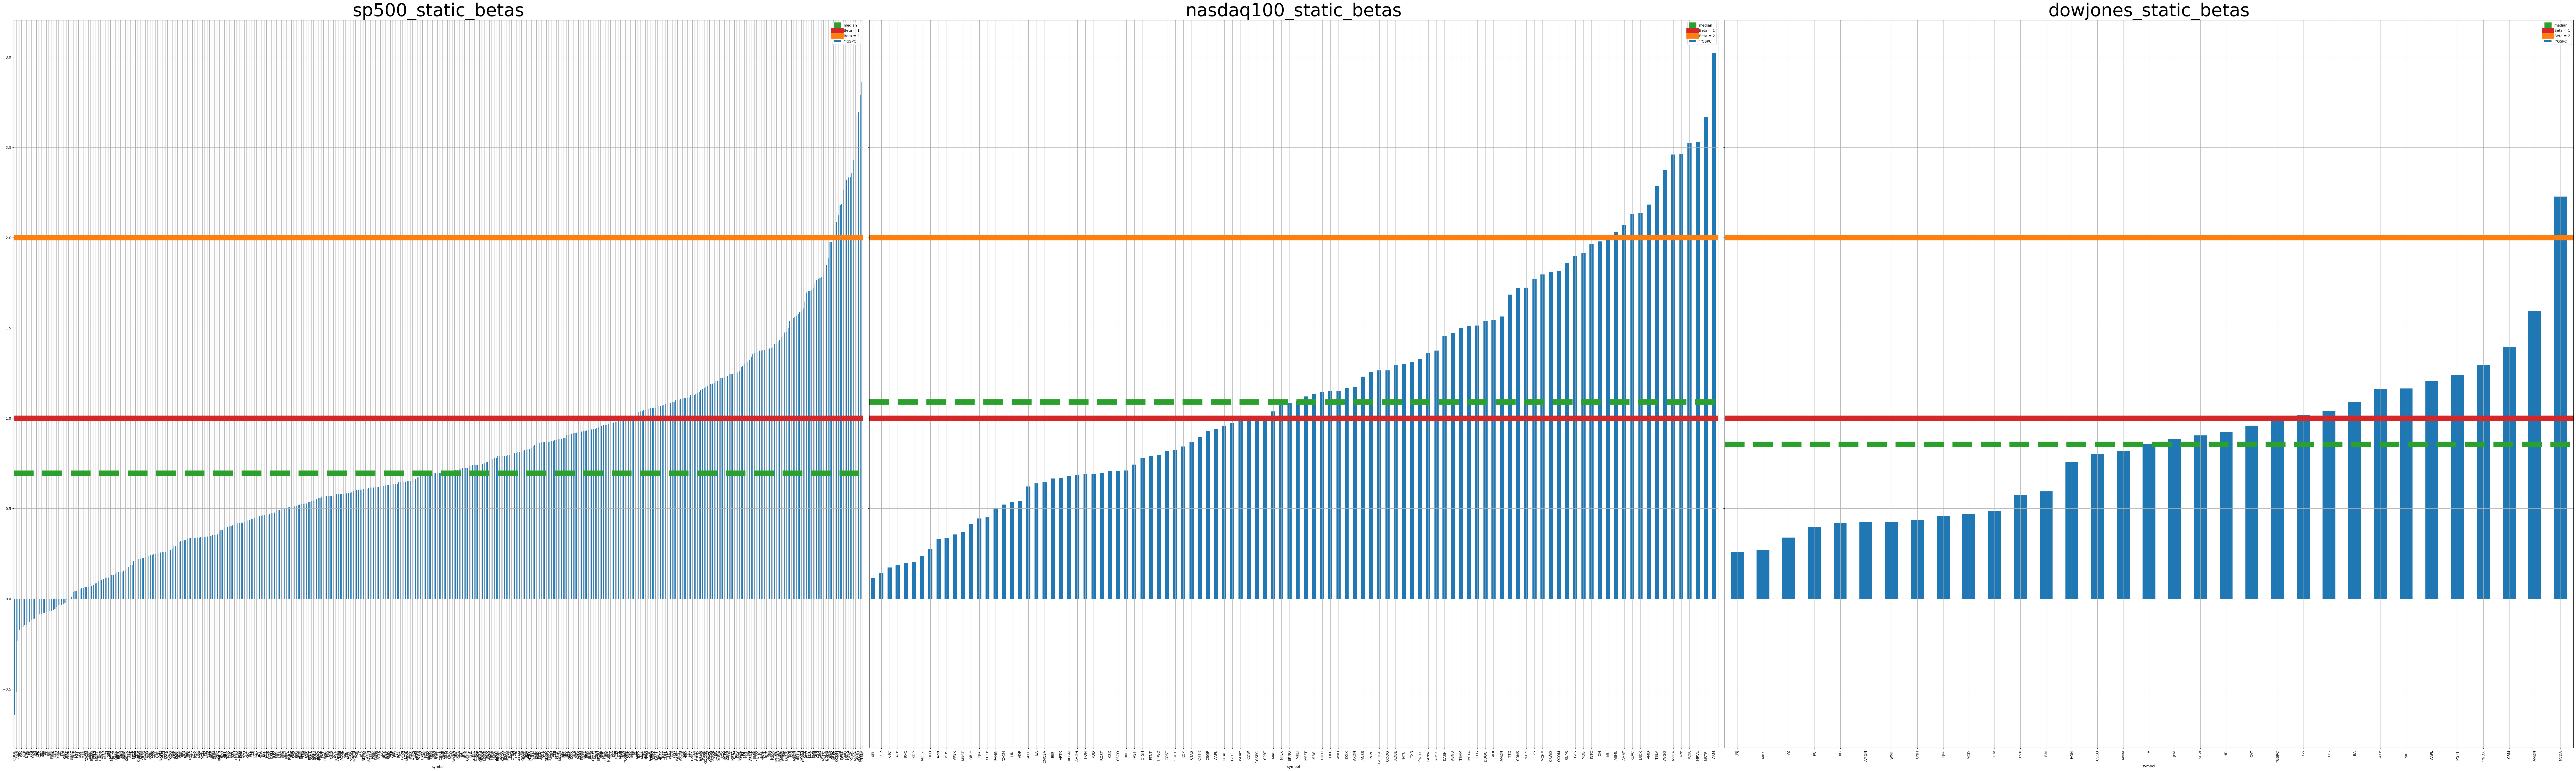

In [1069]:
# plot
fig,ax = plt.subplots(1,3, figsize=(100, 30), sharey=True)
sp500_static_betas.sort_values().plot(kind='bar', ax=ax[0])
nasdaq100_static_betas.sort_values().plot(kind='bar', ax=ax[1])
dowjones_static_betas.sort_values().plot(kind='bar', ax=ax[2])

ax[0].axhline(sp500_static_betas.median(), label='median', color='tab:green', ls='--', lw=15)
ax[1].axhline(nasdaq100_static_betas.median(), label='median', color='tab:green', ls='--', lw=15)
ax[2].axhline(dowjones_static_betas.median(), label='median', color='tab:green', ls='--', lw=15)

ax[0].set_title('sp500_static_betas', fontsize=50)
ax[1].set_title('nasdaq100_static_betas', fontsize=50)
ax[2].set_title('dowjones_static_betas', fontsize=50)

for i in range(len(ax)):
    ax[i].axhline(1, color='tab:red', linewidth=4, label='Beta = 1', lw=15)
    ax[i].axhline(2, color='tab:orange', linewidth=4, label='Beta = 2', lw=15)
    ax[i].legend()
    ax[i].grid()
plt.tight_layout();

# check beta
symbol = 'TSLA'
market = '^GSPC'
returns_df = sp500_returns.dropna()
betas_df = sp500_static_betas
X = returns_df[[market]]
y = returns_df[symbol]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(betas_df[symbol], model.params[market])

# negative betas
print(betas_df[(betas_df < 0) & (betas_df.notnull())].dropna(how='all').sort_values(ascending=True).head())
# defensive betas
print(betas_df[(betas_df >= 0) & (betas_df < 1) & (betas_df.notnull())].dropna(how='all').sort_values(ascending=True).head())
# defensive betas
print(betas_df[(betas_df > 1) & (betas_df.notnull())].dropna(how='all').sort_values(ascending=False).head())

### Rolling betas

In [1072]:
market='^GSPC'
window=30

# rolling betas
sp500_rolling_betas = eqt.vectorized_rolling_calc(sp500_returns.dropna(), market_definition=market, window_size=window, beta=True)
nasdaq100_rolling_betas = eqt.vectorized_rolling_calc(nasdaq100_returns.dropna(), market_definition=market, window_size=window, beta=True)
dowjones_rolling_betas = eqt.vectorized_rolling_calc(dowjones_returns.dropna(), market_definition=market, window_size=window, beta=True)

# rolling corrs
sp500_rolling_corrs = eqt.vectorized_rolling_calc(sp500_returns.dropna(), market_definition=market, window_size=window, beta=False)
nasdaq100_rolling_corrs = eqt.vectorized_rolling_calc(nasdaq100_returns.dropna(), market_definition=market, window_size=window, beta=False)
dowjones_rolling_corrs = eqt.vectorized_rolling_calc(dowjones_returns.dropna(), market_definition=market, window_size=window, beta=False)

sp500_rolling_betas mean 0.8079021758042357
nasdaq100_rolling_betas mean 1.1881957974660287
dowjones_rolling_betas mean 0.7311845925918692


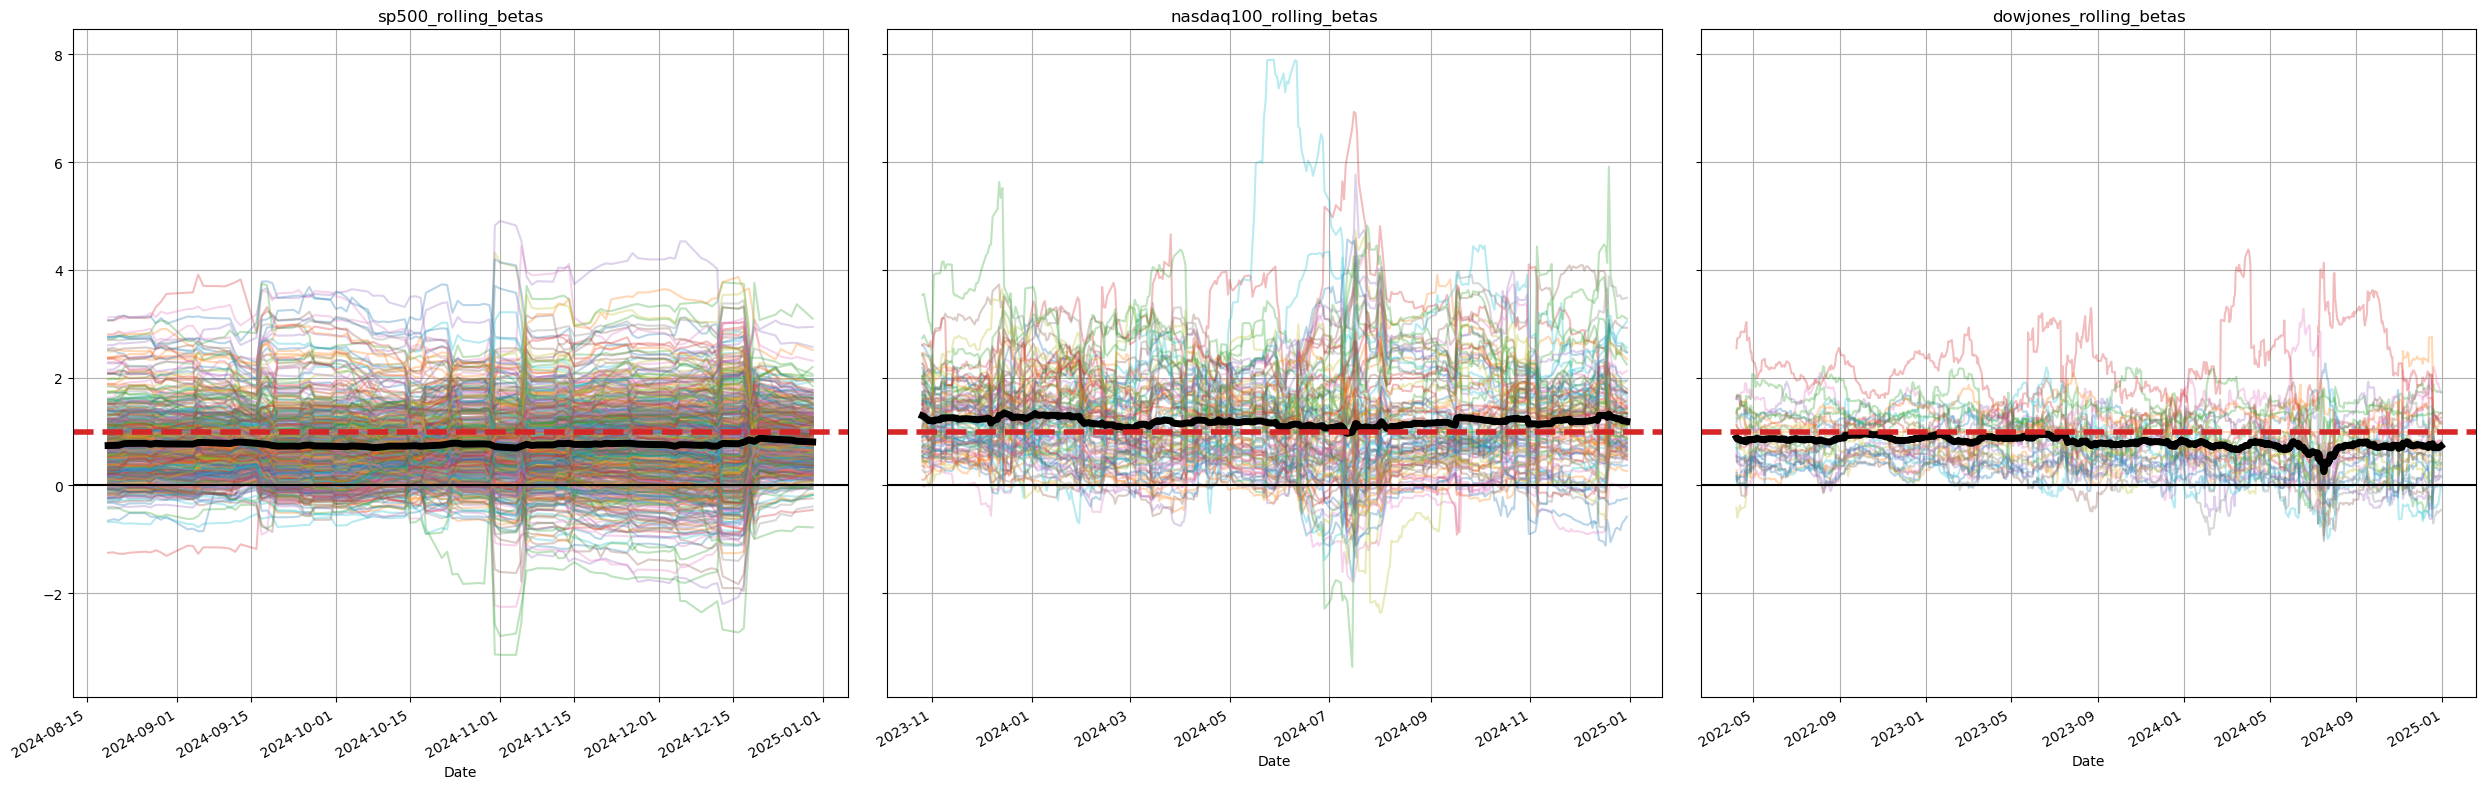

In [1084]:
fig,ax = plt.subplots(1,3, figsize=(25, 8), sharey=True)
sp500_rolling_betas.dropna().plot(ax=ax[0], legend=False, title='sp500_rolling_betas', alpha=0.3)
nasdaq100_rolling_betas.dropna().plot(ax=ax[1], legend=False, title='nasdaq100_rolling_betas', alpha=0.3)
dowjones_rolling_betas.dropna().plot(ax=ax[2], legend=False, title='dowjones_rolling_betas', alpha=0.3)

sp500_rolling_betas.dropna().mean(axis=1).plot(ax=ax[0], label='sp500_rolling_betas mean beta', c='black', lw=5)
nasdaq100_rolling_betas.dropna().mean(axis=1).plot(ax=ax[1], label='nasdaq100_rolling_betas mean beta', c='black', lw=5)
dowjones_rolling_betas.dropna().mean(axis=1).plot(ax=ax[2], label='dowjones_rolling_betas mean beta', c='black', lw=5)

for i in range(len(ax)):
    ax[i].axhline(1, color='tab:red', linewidth=4, label='Beta = 1', ls='--')
    ax[i].axhline(0, color='black')
    ax[i].grid()
plt.tight_layout();

print('sp500_rolling_betas mean', sp500_rolling_betas.dropna().mean(axis=1)[-1])
print('nasdaq100_rolling_betas mean', nasdaq100_rolling_betas.dropna().mean(axis=1)[-1])
print('dowjones_rolling_betas mean', dowjones_rolling_betas.dropna().mean(axis=1)[-1])

sp500_rolling_corrs mean 0.4360219967216743
nasdaq100_rolling_corrs mean 0.500209252422292
dowjones_rolling_corrs mean 0.46537262692709397


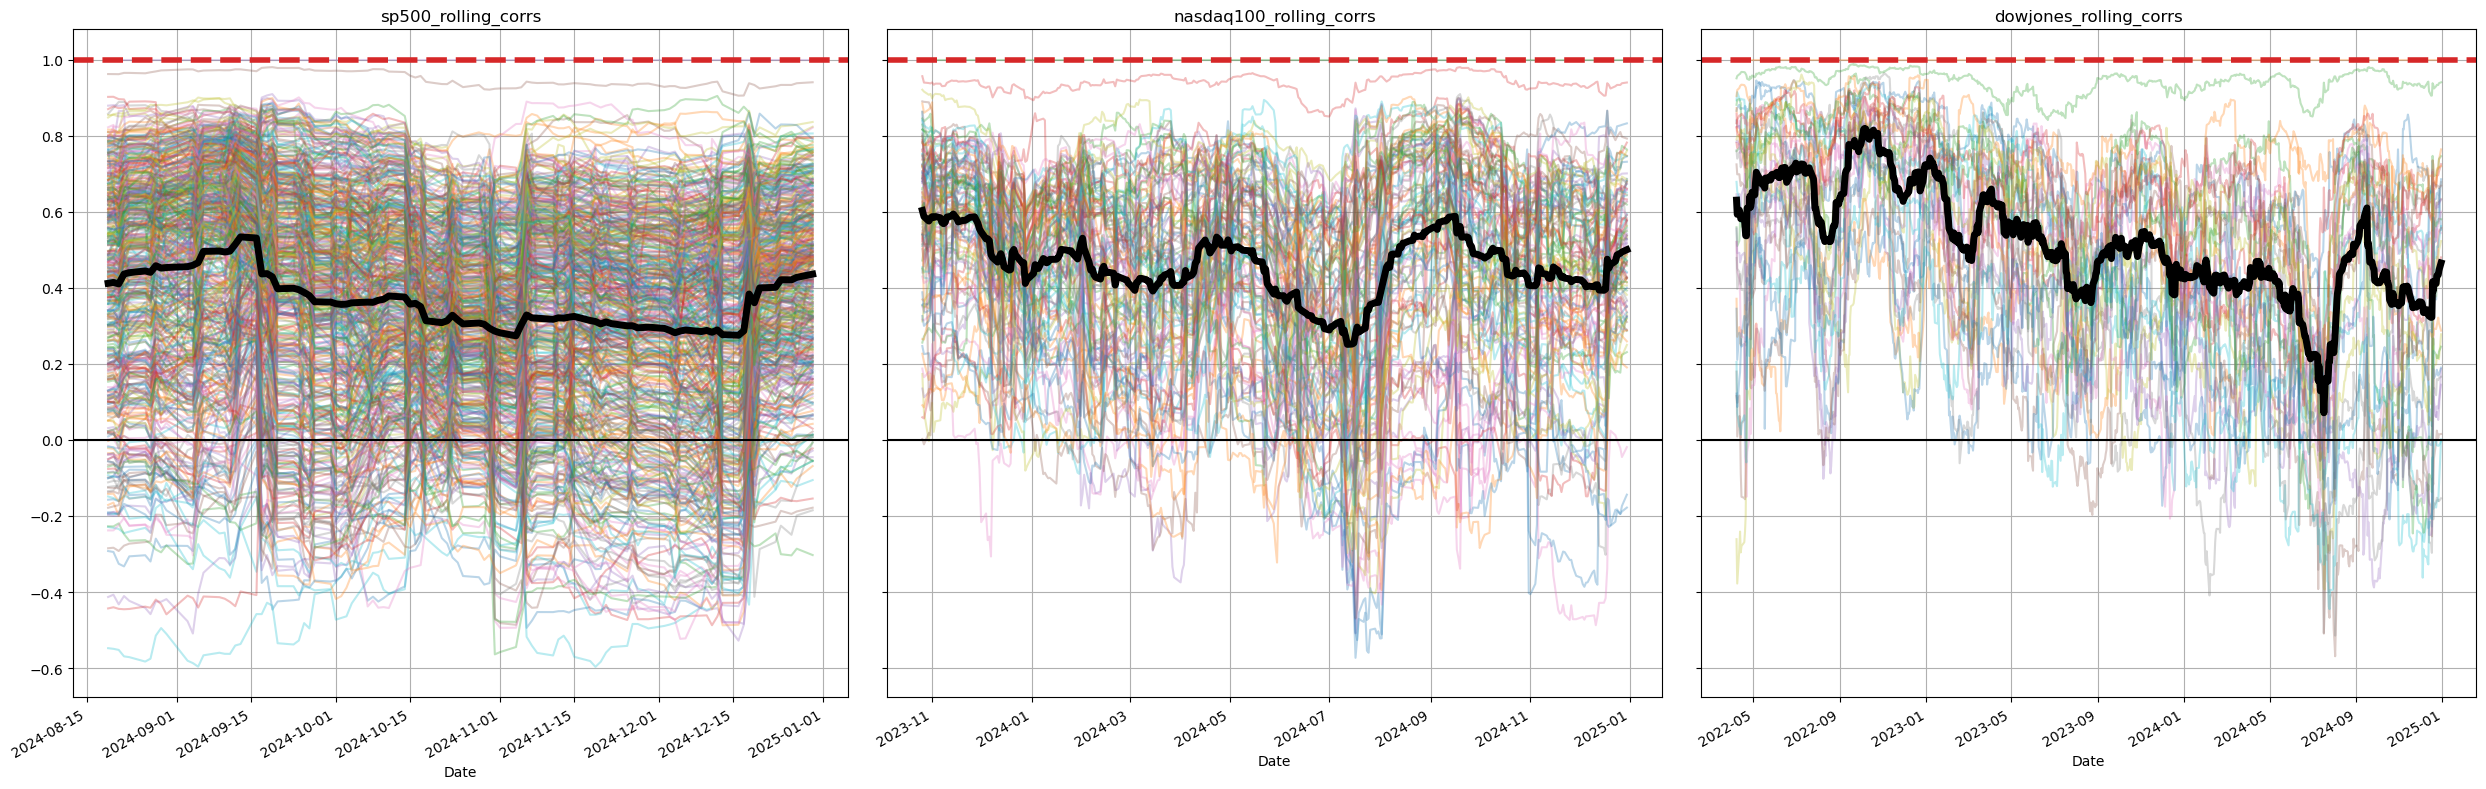

In [1086]:
fig,ax = plt.subplots(1,3, figsize=(25, 8), sharey=True)
sp500_rolling_corrs.dropna().plot(ax=ax[0], legend=False, title='sp500_rolling_corrs', alpha=0.3)
nasdaq100_rolling_corrs.dropna().plot(ax=ax[1], legend=False, title='nasdaq100_rolling_corrs', alpha=0.3)
dowjones_rolling_corrs.dropna().plot(ax=ax[2], legend=False, title='dowjones_rolling_corrs', alpha=0.3)

sp500_rolling_corrs.dropna().mean(axis=1).plot(ax=ax[0], label='sp500_rolling_corrs mean beta', c='black', lw=5)
nasdaq100_rolling_corrs.dropna().mean(axis=1).plot(ax=ax[1], label='nasdaq100_rolling_corrs mean beta', c='black', lw=5)
dowjones_rolling_corrs.dropna().mean(axis=1).plot(ax=ax[2], label='dowjones_rolling_corrs mean beta', c='black', lw=5)

for i in range(len(ax)):
    ax[i].axhline(1, color='tab:red', linewidth=4, label='corr = 1', ls='--')
    ax[i].axhline(0, color='black')
    ax[i].grid()
plt.tight_layout();

print('sp500_rolling_corrs mean', sp500_rolling_corrs.dropna().mean(axis=1)[-1])
print('nasdaq100_rolling_corrs mean', nasdaq100_rolling_corrs.dropna().mean(axis=1)[-1])
print('dowjones_rolling_corrs mean', dowjones_rolling_corrs.dropna().mean(axis=1)[-1])

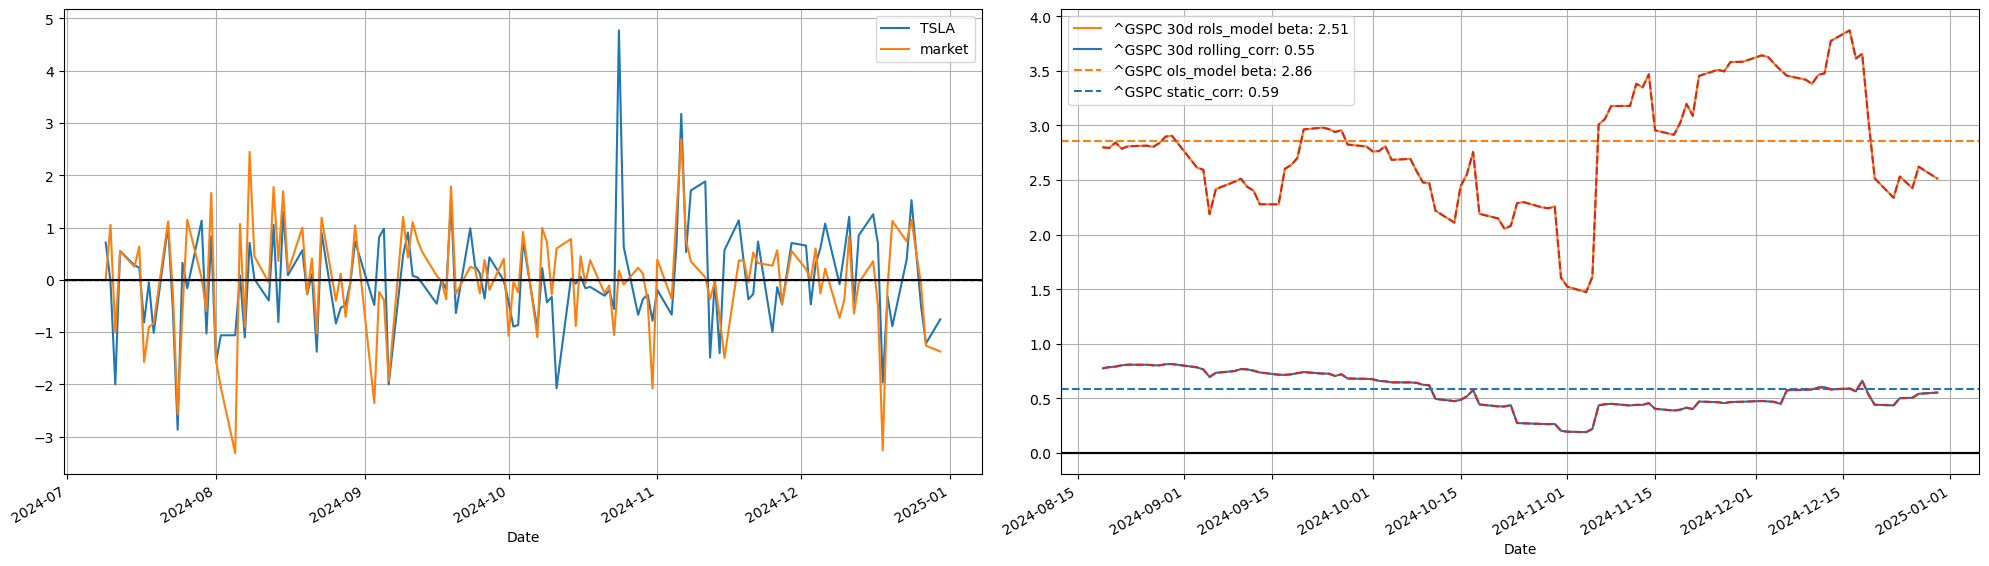

In [1078]:
# check rolling beta
fig,ax = plt.subplots(1,2, figsize=(20, 6))
results = eqt.get_beta_trends(sp500_returns.dropna(), market=market, y_returns=symbol, window=30, plot=True, ax=ax)
sp500_rolling_betas[symbol].plot(ax=ax[1], ls='--', grid=True, c='tab:red');
sp500_rolling_corrs[symbol].plot(ax=ax[1], ls='--', grid=True, c='tab:red');